In [1]:
# Import dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline

# Import libraries
!pip install prophet


In [57]:
# Read in the csv data
df_doordash = pd.read_csv(
    "dash_adjusted_gp.csv",
    # index_col='Date',
    # parse_dates=True
).dropna()

In [58]:
df_doordash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adjusted_gross_profit  7 non-null      object 
 1   q1_2022                7 non-null      float64
 2   q2_2022                7 non-null      float64
 3   q3_2022                7 non-null      float64
 4   q4_2022                7 non-null      float64
 5   q1_2023                7 non-null      float64
 6   q2_2023                7 non-null      float64
 7   q3_2023                7 non-null      float64
 8   q4_2023                7 non-null      float64
 9   q1_2024                7 non-null      float64
dtypes: float64(9), object(1)
memory usage: 688.0+ bytes


In [59]:
df_doordash

,adjusted_gross_profit,q1_2022,q2_2022,q3_2022,q4_2022,q1_2023,q2_2023,q3_2023,q4_2023,q1_2024
0,Gross profit (millions dollars),662.00,686.000,714.000,762.000,921.000,951.000,962.000,1026.000,1129.000
1,Add: Depreciation and amortization related to ...,31.00,42.000,56.000,42.000,45.000,47.000,46.000,48.000,54.000
2,Add: Stock-based compensation expense and cert...,12.00,31.000,29.000,31.000,24.000,43.000,37.000,36.000,33.000
3,Add: Allocated overhead included in cost of re...,9.00,8.000,7.000,8.000,9.000,8.000,8.000,7.000,8.000
4,Add: Inventory write-off related to restructuring,0.00,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,Adjusted Gross Profit,714.00,769.000,806.000,843.000,999.000,1049.000,1053.000,1117.000,1224.000
6,Adjusted Gross Margin (percentages),0.49,0.478,0.474,0.464,0.491,0.492,0.487,0.485,0.487


In [75]:
dates = ["2022-03-31","2022-06-30","2022-09-30","2022-12-31","2023-03-31","2023-06-30","2023-09-30","2023-12-31","2024-03-31"]
gross_profit = df_doordash.iloc[0][1:]
gross_profit_df = pd.DataFrame({"date":dates, "gross_profit":gross_profit})
gross_profit_df

,date,gross_profit
q1_2022,2022-03-31,662.0
q2_2022,2022-06-30,686.0
q3_2022,2022-09-30,714.0
q4_2022,2022-12-31,762.0
q1_2023,2023-03-31,921.0
q2_2023,2023-06-30,951.0
q3_2023,2023-09-30,962.0
q4_2023,2023-12-31,1026.0
q1_2024,2024-03-31,1129.0


In [76]:
# drop the index columns
gross_profit_df.reset_index(drop=True, inplace=True)
gross_profit_df

,date,gross_profit
0,2022-03-31,662.0
1,2022-06-30,686.0
2,2022-09-30,714.0
3,2022-12-31,762.0
4,2023-03-31,921.0
5,2023-06-30,951.0
6,2023-09-30,962.0
7,2023-12-31,1026.0
8,2024-03-31,1129.0


<Axes: >

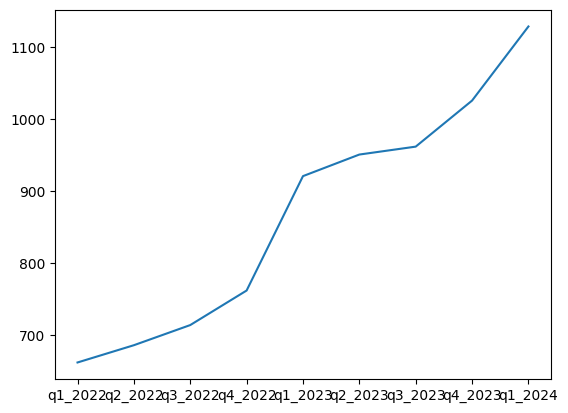

In [63]:
# Simple plot of the data
df_doordash.iloc[0][1:].plot()

<Axes: >

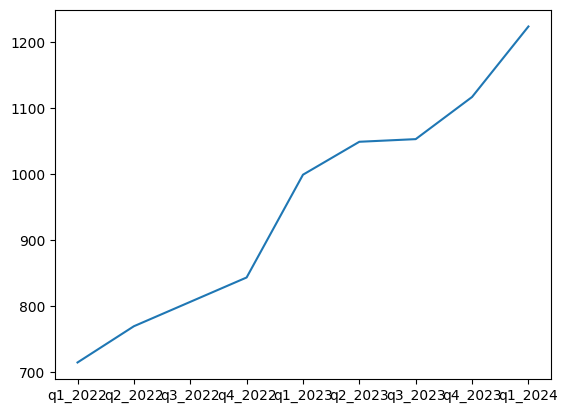

In [62]:
df_doordash.iloc[5][1:].plot()

<Axes: >

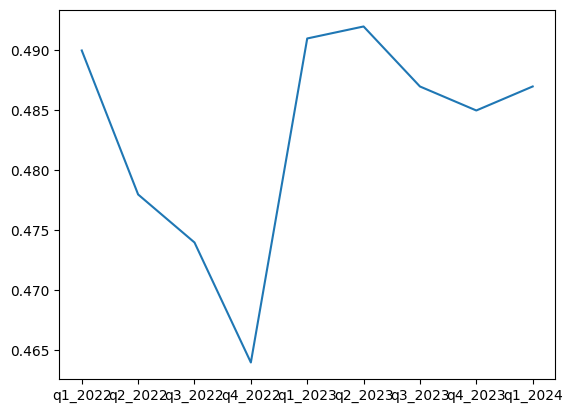

In [64]:
df_doordash.iloc[6][1:].plot()

<Axes: title={'center': 'Gross Profit'}, xlabel='2022', ylabel='millions dollars'>

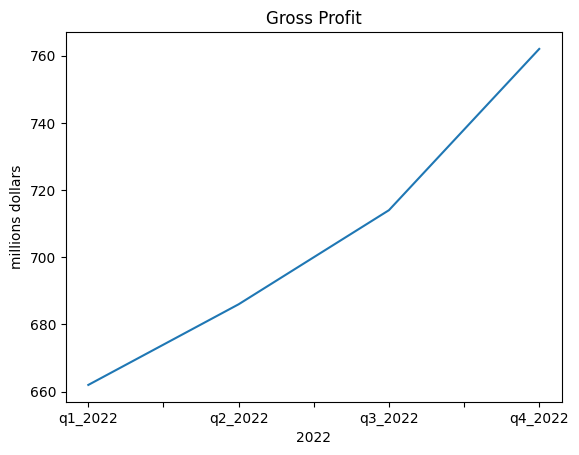

In [51]:
df_doordash.iloc[0][1:5].plot(title="Gross Profit", xlabel="2022", ylabel="millions dollars")

<Axes: title={'center': 'Gross Profit'}, xlabel='2023', ylabel='millions dollars'>

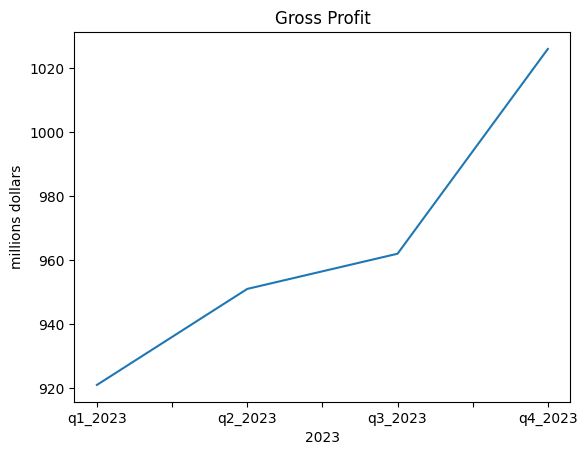

In [52]:
df_doordash.iloc[0][5:9].plot(title="Gross Profit", xlabel="2023", ylabel="millions dollars")

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >], dtype=object)

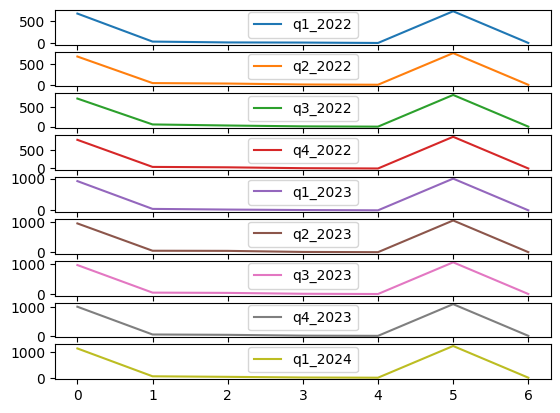

In [53]:
# Plot each column on a separate axes. There will be multiple plots depending on number of columns
df_doordash.plot(subplots=True)

In [77]:
# Reset the index so the date information is no longer the index
# df_doordash = df_doordash.reset_index()

# Label the columns ds and y so that the syntax is recognized by Prophet
gross_profit_df.columns = ["ds","y"]
gross_profit_df

,ds,y
0,2022-03-31,662.0
1,2022-06-30,686.0
2,2022-09-30,714.0
3,2022-12-31,762.0
4,2023-03-31,921.0
5,2023-06-30,951.0
6,2023-09-30,962.0
7,2023-12-31,1026.0
8,2024-03-31,1129.0


In [78]:
# Call the Prophet function, store as an object
m = Prophet()
m

In [80]:
# Fit the time-series model.
m.fit(gross_profit_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_zlyzts_/_10zlio1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_zlyzts_/_x7ngrsa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81187', 'data', 'file=/tmp/tmp_zlyzts_/_10zlio1.json', 'init=/tmp/tmp_zlyzts_/_x7ngrsa.json', 'output', 'file=/tmp/tmp_zlyzts_/prophet_model2m0uw06m/prophet_model-20240802020354.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:03:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:03:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

In [82]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 8 quarters (approx 2 years)
future_doordash = m.make_future_dataframe(periods=8, freq="q")

In [83]:
# Make the predictions for the trend data using the DataFrame
forecast_doordash = m.predict(future_doordash)

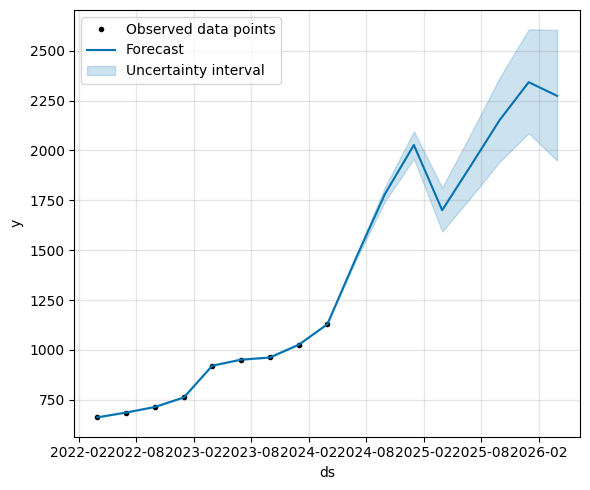

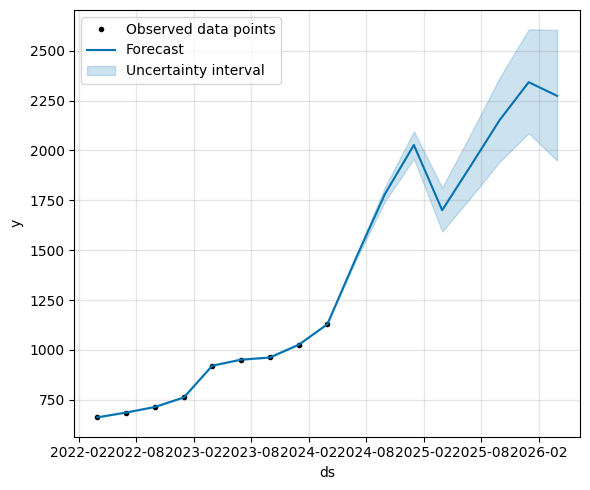

In [88]:
# Plot the Prophet predictions for the Mercado trends data
m.plot(forecast_doordash, include_legend=True,figsize=(6,5))

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

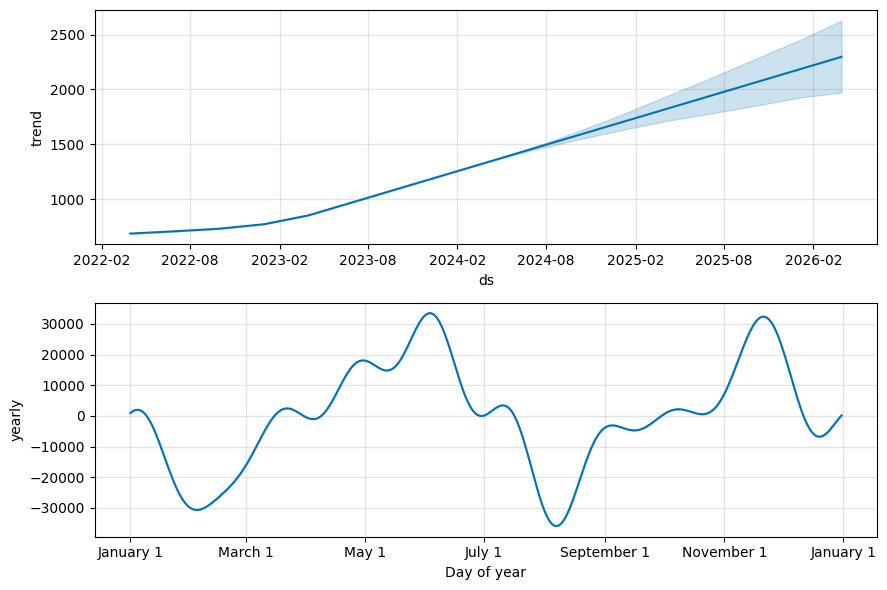

In [89]:
# Reset the index in the forecast_doordash DataFrame
forecast_doordash = forecast_doordash.reset_index()

# Use the plot_components function to visualize the forecast results
# for the forecast_doordash DataFrame
fig1 = m.plot_components(forecast_doordash)